In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn as sk
from sklearn import feature_selection

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.impute import SimpleImputer
# Removed: from sklearn.experimental import ensemble_iterative_imputer # This line caused the ImportError
#from sklearn.impute import IterativeImputer

import joblib
import warnings
import os

import seaborn as sns

warnings.filterwarnings("ignore")
print(os.getcwd())

/content


In [ ]:
#access to google drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:

path = "/content/drive/MyDrive/ICS5110 Project/Final Code & Report"
%cd {path}

/content/drive/.shortcut-targets-by-id/1sJzrnezmTgTbYziBXMG5L0IB2DFeCtZa/ICS5110 Project/Final Code & Report


In [ ]:
print(os.getcwd())

/content/drive/.shortcut-targets-by-id/1sJzrnezmTgTbYziBXMG5L0IB2DFeCtZa/ICS5110 Project/Final Code & Report


In [ ]:
df_cleaned_content = pd.read_csv("cleaned_data_using_content_v2.csv")

In [ ]:
data_df = df_cleaned_content.copy()

In [ ]:
data_df.head()

,source,published_date,title,content,hospital flag,date of incident,weekday of incident,time of incident,weekday_mentioned,time_ampm,...,bike_flag,car_flag,gender_M_flag,gender_F_flag,heavy_vehicle_flag,pedestrian_flag,illegal_flag,traffic_flag,control_flag,vehicle_count
0,police_report,2025-10-09,Collision between a car and a motorbike in Żur...,"Today, at around 0930hrs, the Police were info...",True,2025-10-09,Thursday,930.0,NaN,NaN,...,0,1,1,1,0,0,0,1,0,2
1,police_report,2025-06-20,Car-motorcycle traffic accident,"Yesterday, at around 1830hrs, the Police were ...",True,2025-06-19,Thursday,1830.0,NaN,NaN,...,0,1,1,0,0,0,0,1,0,2
2,police_report,2025-05-12,Car-motorcycle collision in Ħal Qormi,"Today, at around 0800hrs, the Police were info...",True,2025-05-12,Monday,800.0,NaN,NaN,...,0,1,1,0,0,0,0,1,0,2
3,police_report,2025-07-30,Collision between motorcycle and car in Għaxaq,"Yesterday, at around 1800hrs, the Police were ...",True,2025-07-29,Tuesday,1800.0,NaN,NaN,...,0,1,1,0,0,0,0,1,0,2
4,police_report,2025-04-07,Car-motorcycle collision,"Yesterday, at around quarter to nine in the ev...",True,2025-04-06,Sunday,2045.0,NaN,NaN,...,0,1,1,0,0,0,0,1,0,2


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   source                       432 non-null    object 
 1   published_date               432 non-null    object 
 2   title                        432 non-null    object 
 3   content                      432 non-null    object 
 4   hospital flag                432 non-null    bool   
 5   date of incident             432 non-null    object 
 6   weekday of incident          432 non-null    object 
 7   time of incident             300 non-null    float64
 8   weekday_mentioned            264 non-null    object 
 9   time_ampm                    192 non-null    object 
 10  city_id                      353 non-null    float64
 11  city                         353 non-null    object 
 12  found_in                     353 non-null    object 
 13  longitude           

In [ ]:
# Filtering by accidents only

data_df = data_df[data_df["accident_flag"] != 0]

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375 entries, 0 to 430
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   source                       375 non-null    object 
 1   published_date               375 non-null    object 
 2   title                        375 non-null    object 
 3   content                      375 non-null    object 
 4   hospital flag                375 non-null    bool   
 5   date of incident             375 non-null    object 
 6   weekday of incident          375 non-null    object 
 7   time of incident             279 non-null    float64
 8   weekday_mentioned            222 non-null    object 
 9   time_ampm                    174 non-null    object 
 10  city_id                      320 non-null    float64
 11  city                         320 non-null    object 
 12  found_in                     320 non-null    object 
 13  longitude                

In [ ]:
# Checking amount of null values
data_df.isnull().sum().sort_values(ascending = False)

,0
time_ampm,201
weekday_mentioned,153
time of incident,96
city_id,55
city,55
weather_temperature_2m_min,55
weather_temperature_2m_max,55
weather_weather_code,55
population,55
latitude,55


In [ ]:
data_df = data_df.dropna(subset=["city"])

In [ ]:
# Impute empty variables with median

data_df["time of incident"].fillna(data_df["time of incident"].median(),inplace=True)

data_df["weather_temperature_2m_mean"].fillna(data_df["weather_temperature_2m_mean"].median(),inplace=True)

data_df["weather_wind_speed_10m_max"].fillna(data_df["weather_wind_speed_10m_max"].median(),inplace=True)

data_df["weather_precipitation_sum"].fillna(data_df["weather_precipitation_sum"].median(),inplace=True)

data_df["weather_rain_sum"].fillna(data_df["weather_rain_sum"].median(),inplace=True)

data_df["weather_precipitation_hours"].fillna(data_df["weather_precipitation_hours"].median(),inplace=True)


# For the times, fill empty rows  with random values from the existing distribution
times = data_df["time of incident"].dropna()
data_df["time of incident"] = data_df["time of incident"].apply(
    lambda x: np.random.choice(times) if pd.isnull(x) else x
)


# Impute categorical variable with mode
most_frequent_weather = data_df["weather_type_category_code"].mode()[0]
print(f"Most frequent weather category: {most_frequent_weather}")

data_df["weather_type_category_code"].fillna(most_frequent_weather, inplace=True)

Most frequent weather category: 4.0


In [ ]:
# Change date from string
data_df["date of incident"] = pd.to_datetime(data_df["date of incident"])

In [ ]:
# Fill missing weekdaysd
# Fill missing weekdays - only updates NaN values

data_df["weekday of incident"] = data_df["weekday of incident"].fillna(data_df["date of incident"].dt.strftime("%A"))


In [ ]:

# Create the weekend_flag column
# This returns True for Sat/Sun, then .astype(int) converts True to 1 and False to 0
data_df["weekend_flag"] = data_df["weekday of incident"].isin(["Saturday", "Sunday"]).astype(int)

In [ ]:
# Checking amount of null values
data_df.isnull().sum().sort_values(ascending = False)

,0
time_ampm,170
weekday_mentioned,141
title,0
published_date,0
source,0
hospital flag,0
content,0
weekday of incident,0
date of incident,0
time of incident,0


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 320 entries, 0 to 430
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   source                       320 non-null    object        
 1   published_date               320 non-null    object        
 2   title                        320 non-null    object        
 3   content                      320 non-null    object        
 4   hospital flag                320 non-null    bool          
 5   date of incident             320 non-null    datetime64[ns]
 6   weekday of incident          320 non-null    object        
 7   time of incident             320 non-null    float64       
 8   weekday_mentioned            179 non-null    object        
 9   time_ampm                    150 non-null    object        
 10  city_id                      320 non-null    float64       
 11  city                         320 non-null    objec

# Investigating fatal & non fatal accidents

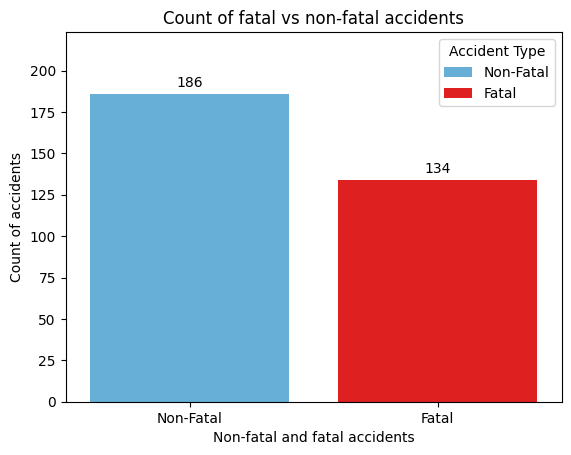

In [ ]:
# Creating a barchart of fatal vs non-fatal accidents
plot_colours = {0: "#56B4E9", 1: "red"}
ax=sns.countplot(data=data_df, x="fatal_flag", palette=plot_colours, hue="fatal_flag")
plt.title("Count of fatal vs non-fatal accidents")
plt.xlabel("Non-fatal and fatal accidents")
plt.ylabel("Count of accidents")
plt.legend(title='Accident Type', labels=['Non-Fatal', 'Fatal'])
ax.set_xticklabels(['Non-Fatal', 'Fatal'])
ax.margins(y=0.2)

# Adding bar values
for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', padding=3)

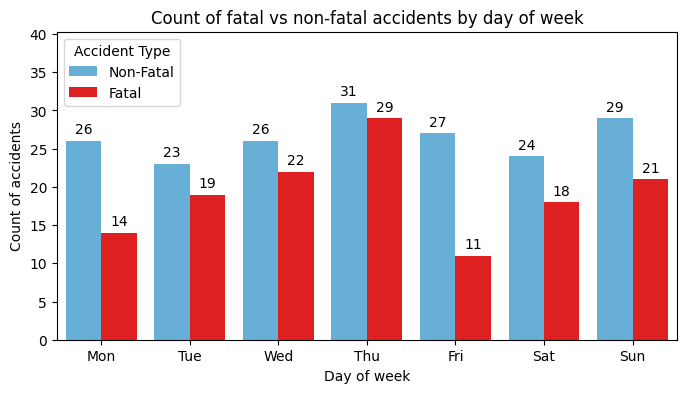

In [ ]:
# Weekdays of incident
plt.figure(figsize=(8, 4))
plot_colours = {0: "#56B4E9", 1: "red"}
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ax=sns.countplot(data=data_df, x="weekday of incident",palette = plot_colours,hue="fatal_flag", order=day_order )
sns.color_palette("viridis")
plt.title("Count of fatal vs non-fatal accidents by day of week")
plt.xlabel("Day of week")
plt.ylabel("Count of accidents")
plt.legend(title='Accident Type', labels=['Non-Fatal', 'Fatal'])
ax.set_xticklabels(["Mon", "Tue","Wed","Thu", "Fri", "Sat", "Sun"])
ax.margins(y=0.3)

# Adding bar values
for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', padding=3)

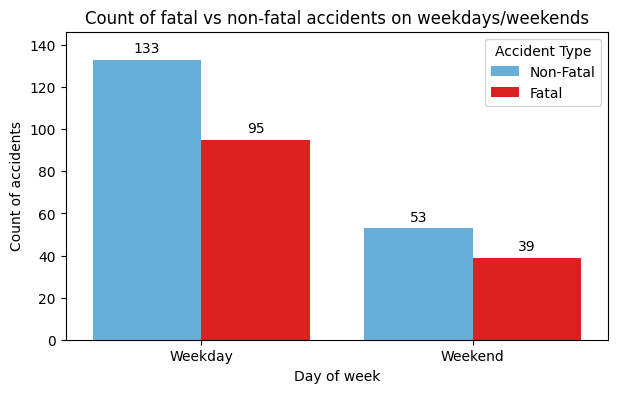

In [ ]:
# Weekdays of incident
plt.figure(figsize=(7, 4))
ax=sns.countplot(data=data_df, x="weekend_flag",palette = plot_colours,hue="fatal_flag")
plt.title("Count of fatal vs non-fatal accidents on weekdays/weekends")
plt.xlabel("Day of week")
plt.ylabel("Count of accidents")
plt.legend(title='Accident Type', labels=['Non-Fatal', 'Fatal'])
ax.set_xticklabels(['Weekday', 'Weekend'])
ax.margins(y=0.1)

# Adding bar values
for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', padding=3)

In [ ]:
weekend_fatal_df = data_df.groupby(["weekend_flag", "fatal_flag"]).size().reset_index(name="count")
print(weekend_fatal_df)

   weekend_flag  fatal_flag  count
0             0           0    133
1             0           1     95
2             1           0     53
3             1           1     39


In [ ]:
weekend_fatal_pct_df = (data_df.groupby('weekend_flag')['fatal_flag']
          .value_counts(normalize=True)
          .rename('percentage')
          .mul(100) # Convert to 0-100 range
          .reset_index())

In [ ]:
weekend_fatal_pct_df.head()

,weekend_flag,fatal_flag,percentage
0,0,0,58.333333
1,0,1,41.666667
2,1,0,57.608696
3,1,1,42.391304


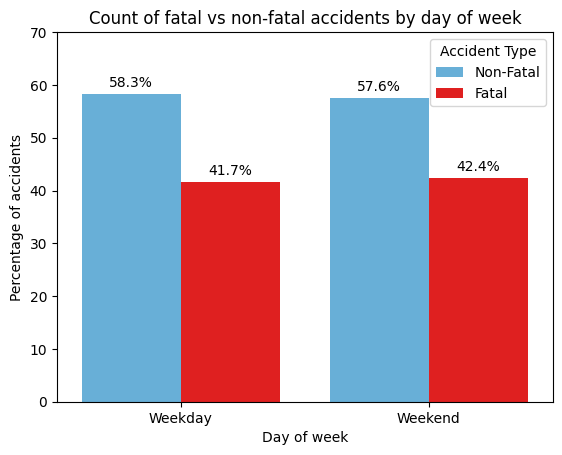

In [ ]:
plot_colours_txt = {"Non-Fatal": "#56B4E9", "Fatal": "red"}
# Weekdays of incident
# 1. Update the data values first
weekend_fatal_pct_df['fatal_flag_name'] = weekend_fatal_pct_df['fatal_flag'].map({0: 'Non-Fatal', 1: 'Fatal'})

ax=sns.barplot(data=weekend_fatal_pct_df, x="weekend_flag",palette = plot_colours_txt,hue="fatal_flag_name", y ="percentage" )
plt.title("Count of fatal vs non-fatal accidents by day of week")
plt.xlabel("Day of week")
plt.ylabel("Percentage of accidents")
plt.legend(title='Accident Type')
ax.set_xticklabels(['Weekday', 'Weekend'])
ax.margins(y=0.2)

# Adding percentage values
for i in ax.containers:
    ax.bar_label(i, fmt='%.1f%%', padding=3)

In [ ]:
#counts = data_dropped_df["weather_category"].value_counts()

#print(counts)

In [ ]:
data_df["time of incident"].head()

,time of incident
0,930.0
1,1830.0
2,800.0
3,1800.0
4,2045.0


In [ ]:
    # Extract hour from time of incident

data_df["hour_of_incident"] = (data_df["time of incident"]//100).astype("Int64")


In [ ]:
data_df["hour_of_incident"].head()

,hour_of_incident
0,9
1,18
2,8
3,18
4,20


In [ ]:
# Get number of fatalites and no. of accidents for each hour
fatality_by_hour = data_df.groupby("hour_of_incident").agg({"fatal_flag":["sum","count"]})
fatality_by_hour.columns = ["fatal_count", "accident_count"]

# If any hour has 0 accidents, fill with 0, so the time still shows on the plot
fatality_by_hour = fatality_by_hour.reindex(range(24), fill_value=0)

# Calculate fatality rate. Handles div by 0 by using fillna(0)
fatality_by_hour["fatality_rate"] = (fatality_by_hour["fatal_count"]/fatality_by_hour["accident_count"]).fillna(0).round(2)
fatality_by_hour = fatality_by_hour.reset_index()
fatality_by_hour["fatal_flag"] = data_df["fatal_flag"]

In [ ]:
#print(fatality_by_hour)

In [ ]:
def get_risk_label(rate):
  if rate > 0.5: return "High"
  elif rate > 0.35: return "Medium"
  else: return "Low"


fatality_by_hour["risk_level"] = fatality_by_hour["fatality_rate"].apply(get_risk_label)


In [ ]:
#print (fatality_by_hour)

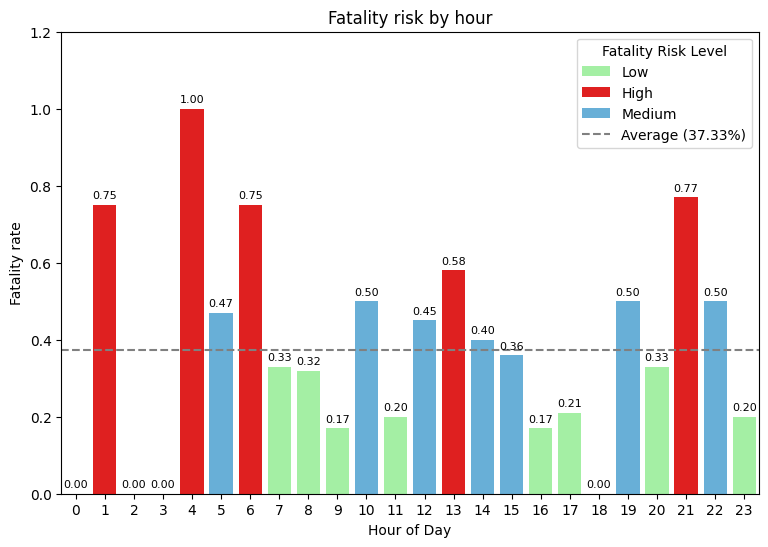

In [ ]:
plt.figure(figsize=(9, 6))
ax = sns.barplot(data = fatality_by_hour, x = "hour_of_incident", y="fatality_rate", hue="risk_level", palette={"High": "red", "Medium": "#56B4E9", "Low": "#98FB98"})

plt.title("Fatality risk by hour")
plt.xlabel("Hour of Day")
plt.ylabel("Fatality rate")
ax.margins(y=0.2)
ax.axhline(y=fatality_by_hour["fatality_rate"].mean(),color="grey", linestyle="--",label=f'Average ({fatality_by_hour["fatality_rate"].mean():.2%})')
plt.legend(title="Fatality Risk Level")

# Adding percentage values
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', padding=3, fontsize=8)


In [ ]:
# Get number of fatalites and no. of accidents for each hour
fatality_by_hour = data_df.groupby("hour_of_incident").agg({"fatal_flag":["sum","count"]})
fatality_by_hour.columns = ["fatal_count", "accident_count"]

# If any hour has 0 accidents, fill with 0, so the time still shows on the plot
fatality_by_hour = fatality_by_hour.reindex(range(24), fill_value=0)

# Calculate fatality rate. Handles div by 0 by using fillna(0)
fatality_by_hour["fatality_rate"] = (fatality_by_hour["fatal_count"]/fatality_by_hour["accident_count"]).fillna(0).round(2)
fatality_by_hour = fatality_by_hour.reset_index()
fatality_by_hour["fatal_flag"] = data_df["fatal_flag"]

In [ ]:
fatality_by_hour.head()

,hour_of_incident,fatal_count,accident_count,fatality_rate,fatal_flag
0,0,0,1,0.00,0
1,1,3,4,0.75,0
2,2,0,2,0.00,0
3,3,0,0,0.00,0
4,4,2,2,1.00,0


Text(0.5, 1.0, 'Fatality rate and accident count per hour')

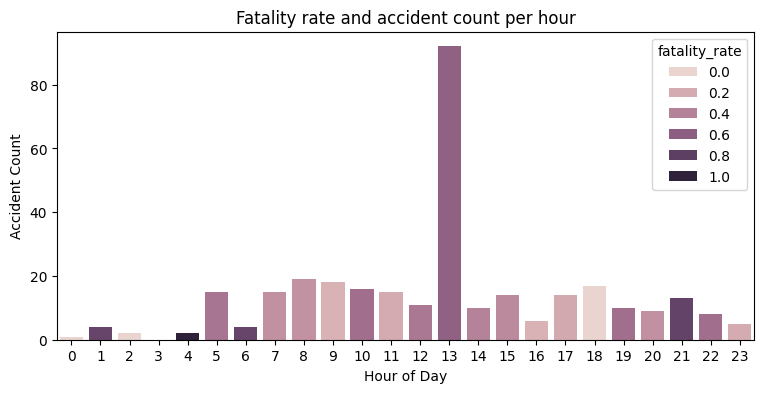

In [ ]:
plt.figure(figsize=(9,4))
ax=sns.barplot(data=fatality_by_hour, x="hour_of_incident",y="accident_count", hue="fatality_rate")
plt.xlabel("Hour of Day")
plt.ylabel("Accident Count")
plt.title("Fatality rate and accident count per hour")

Text(0, 0.5, 'Fatality Rate')

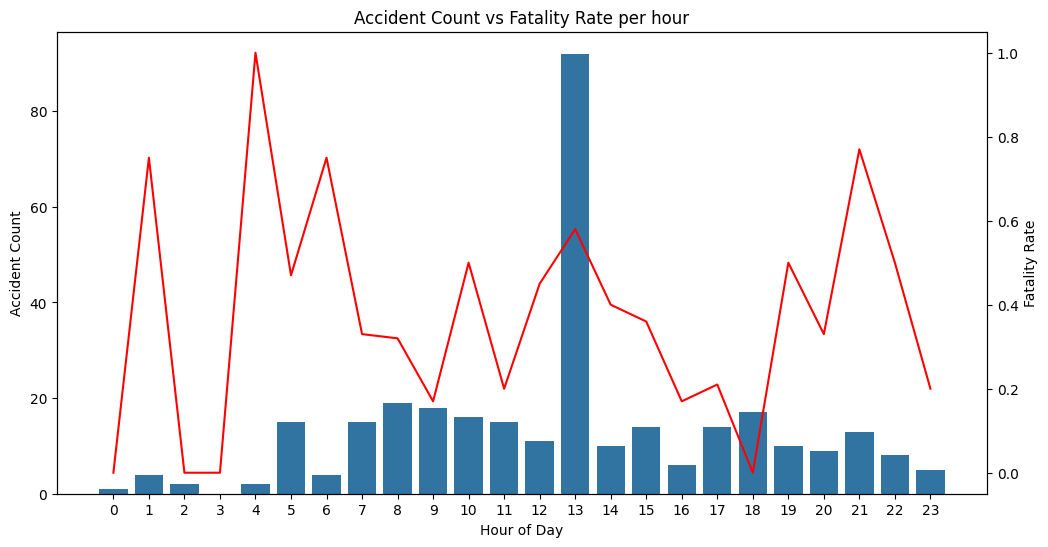

In [ ]:
fig,ax = plt.subplots(figsize=(12,6))

sns.barplot(data=fatality_by_hour, x="hour_of_incident", y="accident_count", ax=ax)
ax.set_ylabel("Accident Count")
ax.set_xlabel("Hour of Day")
ax.set_title("Accident Count vs Fatality Rate per hour")

# Creating a secondary plot which shares the same x-axis
ax2=ax.twinx()
ax=sns.lineplot(data=fatality_by_hour, x="hour_of_incident", y="fatality_rate", color="red")
ax2.set_ylabel("Fatality Rate")

In [ ]:
# Sorting time into categories

conditions = [
    (data_df["hour_of_incident"] >=6) & (data_df["hour_of_incident"] <=9), # Morning Rush hour
    (data_df["hour_of_incident"] >=10) & (data_df["hour_of_incident"] <=15), # Late-morning
    (data_df["hour_of_incident"] >=16) & (data_df["hour_of_incident"] <=19), # Evening Rush hour
    (data_df["hour_of_incident"] >=20) & (data_df["hour_of_incident"] <=22), # Evening
    (data_df["hour_of_incident"] >=23) | (data_df["hour_of_incident"] <=5) # Night
]
time_categories = ["Morning Rush", "Late-Morning","Evening Rush","Evening","Night"]

# Create new column
data_df["time_period"] = np.select(conditions,time_categories, default="Other")

In [ ]:
weekend_fatal_pct_df['fatal_flag_name'] = weekend_fatal_pct_df['fatal_flag'].map({0: 'Non-Fatal', 1: 'Fatal'})

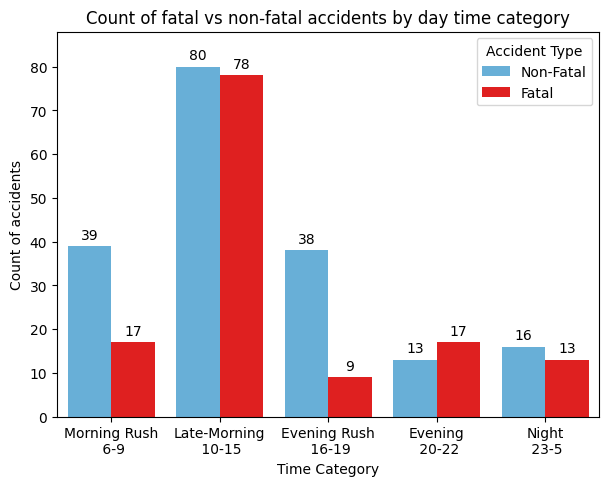

In [ ]:
# Weekdays of incident
plt.figure(figsize=(7,5))
ax=sns.countplot(data=data_df, x="time_period",palette = plot_colours,hue="fatal_flag", order=time_categories)
plt.title("Count of fatal vs non-fatal accidents by day time category")
plt.xlabel("Time Category")
plt.ylabel("Count of accidents")
plt.legend(title='Accident Type', labels=['Non-Fatal', 'Fatal'])

ax.set_xticklabels(["Morning Rush\n 6-9", "Late-Morning\n 10-15", "Evening Rush\n 16-19", "Evening\n 20-22", "Night\n 23-5"])

ax.margins(y=0.1)

# Adding bar values
for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', padding=3)

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 320 entries, 0 to 430
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   source                       320 non-null    object        
 1   published_date               320 non-null    object        
 2   title                        320 non-null    object        
 3   content                      320 non-null    object        
 4   hospital flag                320 non-null    bool          
 5   date of incident             320 non-null    datetime64[ns]
 6   weekday of incident          320 non-null    object        
 7   time of incident             320 non-null    float64       
 8   weekday_mentioned            179 non-null    object        
 9   time_ampm                    150 non-null    object        
 10  city_id                      320 non-null    float64       
 11  city                         320 non-null    objec

In [ ]:
data_df["weather_type_category_code"].info()

<class 'pandas.core.series.Series'>
Index: 320 entries, 0 to 430
Series name: weather_type_category_code
Non-Null Count  Dtype  
--------------  -----  
320 non-null    float64
dtypes: float64(1)
memory usage: 13.1 KB


In [ ]:
weather_map = {1: 'Sunny/Clear', 2: 'Cloudy', 3: 'Foggy', 4:"Rain/Drizzle", 0:"Other"}

# converting weather category codes to actual categories before one-hot encoding to improve readability in shap plot
data_df["weather_desc"]  = data_df["weather_type_category_code"].map(weather_map)
data_binary_df = pd.get_dummies(data_df,columns=["weather_desc"], prefix="Weather")

In [ ]:
# One-hot encoding of time periods
data_binary_df = pd.get_dummies(data_binary_df, columns=["time_period"], prefix="Time")

In [ ]:
data_binary_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 320 entries, 0 to 430
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   source                       320 non-null    object        
 1   published_date               320 non-null    object        
 2   title                        320 non-null    object        
 3   content                      320 non-null    object        
 4   hospital flag                320 non-null    bool          
 5   date of incident             320 non-null    datetime64[ns]
 6   weekday of incident          320 non-null    object        
 7   time of incident             320 non-null    float64       
 8   weekday_mentioned            179 non-null    object        
 9   time_ampm                    150 non-null    object        
 10  city_id                      320 non-null    float64       
 11  city                         320 non-null    objec

In [ ]:
# List of columns to drop
useless_columns = ["source", "published_date", "title", "content", "found_in", "population", "time_ampm", "weekday_mentioned", "date_str"]
string_columns = ["date_str", "weekday_mentioned","city","weather_category", "weekday of incident", "date of incident"]
duplicate_info_columns = ["longitude", "latitude", "weather_temperature_2m_max", "weather_temperature_2m_min", "weather_weather_code", "city_id", "hospital_flag", "time of incident","weather_type_category_code", "hour_of_incident", "accident_flag", "gender_F_flag"]
retrospective_columns = ["hospital flag", "injury_flag", "severe_flag", "minor_flag", "illegal_flag","traffic_flag", "control_flag"]
drop_columns = useless_columns + string_columns + duplicate_info_columns + retrospective_columns

In [ ]:
# Removing extra columns from dataset
data_drop_df = data_binary_df.drop(columns=drop_columns)

In [ ]:
data_dropna_df = data_drop_df.dropna()

print(f"Data before dropping na was of length: {len(data_drop_df)}")
print(f"Data after dropping na is of length: {len(data_dropna_df)}")



Data before dropping na was of length: 320
Data after dropping na is of length: 320


In [ ]:
data_dropna_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 320 entries, 0 to 430
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   weather_temperature_2m_mean  320 non-null    float64
 1   weather_precipitation_sum    320 non-null    float64
 2   weather_precipitation_hours  320 non-null    float64
 3   weather_rain_sum             320 non-null    float64
 4   weather_wind_speed_10m_max   320 non-null    float64
 5   fatal_flag                   320 non-null    int64  
 6   motorcycle_flag              320 non-null    int64  
 7   bike_flag                    320 non-null    int64  
 8   car_flag                     320 non-null    int64  
 9   gender_M_flag                320 non-null    int64  
 10  heavy_vehicle_flag           320 non-null    int64  
 11  pedestrian_flag              320 non-null    int64  
 12  vehicle_count                320 non-null    int64  
 13  weekend_flag             

In [ ]:
# Splitting the data into 80% training and 20% testing
# Using stratify to to ensure even split between fatal and non-fatal accidents

X_train, X_test, y_train, y_test = train_test_split(data_dropna_df, data_dropna_df["fatal_flag"], test_size=0.2, random_state=0, stratify=data_dropna_df["fatal_flag"])

# Keep record of all labels/targets
all_labels = data_dropna_df["fatal_flag"]

In [ ]:
# Checking Target variable split

print(f"Targets for training dataset are: {y_test.head()}")
print(f"Targets for testing dataset are: {y_train.head()}")



Targets for training dataset are: 331    1
33     0
373    0
57     0
297    1
Name: fatal_flag, dtype: int64
Targets for testing dataset are: 51     0
247    0
188    0
306    1
307    1
Name: fatal_flag, dtype: int64


In [ ]:
print(f"Target training counts for {y_test.value_counts()} are:")
print(f"\nTarget testing counts for {y_train.value_counts()} are:")

Target training counts for fatal_flag
0    37
1    27
Name: count, dtype: int64 are:

Target testing counts for fatal_flag
0    149
1    107
Name: count, dtype: int64 are:


In [ ]:
# Checking rest of data split

print(f"Training dataset is: {X_train.info()}\n")
print(f"\nTesting dataset is: {X_test.info()}")


<class 'pandas.core.frame.DataFrame'>
Index: 256 entries, 51 to 258
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   weather_temperature_2m_mean  256 non-null    float64
 1   weather_precipitation_sum    256 non-null    float64
 2   weather_precipitation_hours  256 non-null    float64
 3   weather_rain_sum             256 non-null    float64
 4   weather_wind_speed_10m_max   256 non-null    float64
 5   fatal_flag                   256 non-null    int64  
 6   motorcycle_flag              256 non-null    int64  
 7   bike_flag                    256 non-null    int64  
 8   car_flag                     256 non-null    int64  
 9   gender_M_flag                256 non-null    int64  
 10  heavy_vehicle_flag           256 non-null    int64  
 11  pedestrian_flag              256 non-null    int64  
 12  vehicle_count                256 non-null    int64  
 13  weekend_flag            

In [ ]:
# Checking dimensions of each dataset:

print(f"Dimensions for training dataset are: {X_train.shape}")
print(f"Dimensions for training lables are: {y_train.shape}")
print(f"Dimensions for testing dataset are: {X_test.shape}")
print(f"Dimensions for training labels are: {y_test.shape}")

Dimensions for training dataset are: (256, 22)
Dimensions for training lables are: (256,)
Dimensions for testing dataset are: (64, 22)
Dimensions for training labels are: (64,)


In [ ]:
# Removing target variable from dataset
X_train = X_train.drop(columns="fatal_flag")
X_test = X_test.drop(columns="fatal_flag")

In [ ]:
# Rechecking dimensions of dataset, to confirm the column was removed.

# Checking dimensions of each dataset:

print(f"Dimensions for training dataset are: {X_train.shape}")
print(f"Dimensions for training labels are: {y_train.shape}")
print(f"Dimensions for testing dataset are: {X_test.shape}")
print(f"Dimensions for training labels are: {y_test.shape}")

Dimensions for training dataset are: (256, 21)
Dimensions for training labels are: (256,)
Dimensions for testing dataset are: (64, 21)
Dimensions for training labels are: (64,)


# Random Forest

In [ ]:
# Defining parameters for random forest
# Refer to: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
"""
param_grid = {
    "bootstrap": [True, False], #If true, sub-sample size is controlled by the max_samples parameter, otherwise it takes all
    "n_estimators":[50,100,200], # Number of trees in forest
    "min_samples_split": [2,5,10], # Minimum number of samples required to split an internal node
    "min_samples_leaf": [1,2,4], # # Minimum number of samples required to be at a leaf node
    "max_features":["sqrt","log2", None], # If 'sqrt' max_features=sqrt(n_features), If 'log2' max_features=log2(n_features), If None max_features=n_features
    "class_weight":[None, "balanced"], # If balanced, model uses values of the target variable to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)). Used mainly when dealing with an imbalanced dataset.
    "max_depth": [5,10,None] # Maximum dept of tree. If none, nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split value.
}
"""

'\nparam_grid = {\n    "bootstrap": [True, False], #If true, sub-sample size is controlled by the max_samples parameter, otherwise it takes all\n    "n_estimators":[50,100,200], # Number of trees in forest\n    "min_samples_split": [2,5,10], # Minimum number of samples required to split an internal node\n    "min_samples_leaf": [1,2,4], # # Minimum number of samples required to be at a leaf node\n    "max_features":["sqrt","log2", None], # If \'sqrt\' max_features=sqrt(n_features), If \'log2\' max_features=log2(n_features), If None max_features=n_features\n    "class_weight":[None, "balanced"], # If balanced, model uses values of the target variable to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)). Used mainly when dealing with an imbalanced dataset.\n    "max_depth": [5,10,None] # Maximum dept of tree. If none, nodes are expanded until all leaves are pure or until all leaves contain less than min_

In [ ]:
# Defining parameters for random forest
# Refer to: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

param_grid = {
    "bootstrap": [True], #If true, sub-sample size is controlled by the max_samples parameter, otherwise it takes all
    "n_estimators":[50,100,200], # Number of trees in forest
    "min_samples_split": [3,5,10], # Minimum number of samples required to split an internal node
    "min_samples_leaf": [2,4], # # Minimum number of samples required to be at a leaf node
    "max_features":["sqrt","log"], # If 'sqrt' max_features=sqrt(n_features), If 'log2' max_features=log2(n_features), If None max_features=n_features
    "class_weight":["balanced"], # If balanced, model uses values of the target variable to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)). Used mainly when dealing with an imbalanced dataset.
    "max_depth": [3,5,8,10] # Maximum dept of tree. If none, nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split value.
}


In [ ]:
# Create base default Random Forest Classifier using the Gini index for tree splitting (measure of impurity)
rf = RandomForestClassifier(criterion="gini", random_state=0)

In [ ]:
# Running a random search rf based on parameters (to reduce runtime)

random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    cv=10, # Number of cross-validations
    n_jobs=-1, # Number of jobs to run in parallel. -1 means using all processors
    verbose=2, # Controls verbosity when fitting and predicting. By using 2, it leads to more written info when using model
    random_state=0,
    scoring="roc_auc", # Optimising for highest recall - missing fatal accident (False Negative) is worse than having a false alarm (false Positive) - default is optimize for accuracy
    n_iter=200
)

In [ ]:
random_search_rf.estimator

RandomForestClassifier(random_state=0)

In [ ]:
random_search_rf.fit(X_train, y_train)
best_randomparams=random_search_rf.best_params_
best_randomestimators=random_search_rf.best_estimator_

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


In [ ]:
print(f"Best CV Recall: {random_search_rf.best_score_:.3f}")

Best CV Recall: 0.648


In [ ]:
# After your RandomizedSearchCV has finished:
cv_results = pd.DataFrame(random_search_rf.cv_results_)

# Look at the top 10 parameter combinations by recall
top_combinations = cv_results.nlargest(10, 'mean_test_score')[
    ['mean_test_score', 'std_test_score', 'rank_test_score', 'params']
]

print("="*70)
print("TOP 10 PARAMETER COMBINATIONS (by CV Recall)")
print("="*70)
for idx, row in top_combinations.iterrows():
    print(f"\nRank {row['rank_test_score']}: CV Recall = {row['mean_test_score']:.3f} ± {row['std_test_score']:.3f}")
    params = row['params']
    print(f"  Parameters:")
    for param, value in params.items():
        print(f"    {param}: {value}")



TOP 10 PARAMETER COMBINATIONS (by CV Recall)

Rank 1: CV Recall = 0.648 ± 0.097
  Parameters:
    n_estimators: 50
    min_samples_split: 10
    min_samples_leaf: 2
    max_features: sqrt
    max_depth: 10
    class_weight: balanced
    bootstrap: True

Rank 2: CV Recall = 0.644 ± 0.117
  Parameters:
    n_estimators: 200
    min_samples_split: 5
    min_samples_leaf: 2
    max_features: sqrt
    max_depth: 3
    class_weight: balanced
    bootstrap: True

Rank 3: CV Recall = 0.643 ± 0.098
  Parameters:
    n_estimators: 200
    min_samples_split: 5
    min_samples_leaf: 2
    max_features: sqrt
    max_depth: 8
    class_weight: balanced
    bootstrap: True

Rank 4: CV Recall = 0.643 ± 0.105
  Parameters:
    n_estimators: 50
    min_samples_split: 3
    min_samples_leaf: 4
    max_features: sqrt
    max_depth: 5
    class_weight: balanced
    bootstrap: True

Rank 4: CV Recall = 0.643 ± 0.105
  Parameters:
    n_estimators: 50
    min_samples_split: 5
    min_samples_leaf: 4
    max_

In [ ]:
# Getting the best parameters (from random search)
print(f'Best Parameters from random search are ... ')
print('Parameter:{}'.format(best_randomparams))


Best Parameters from random search are ... 
Parameter:{'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'class_weight': 'balanced', 'bootstrap': True}


# Checking performance of model

In [ ]:
# Calculates probability for each each class
proba_predict_train = best_randomestimators.predict_proba(X_train)

# Gives final binary classification based on default treshold (0.5)
class_predict_train = pd.DataFrame(best_randomestimators.predict(X_train))

In [ ]:
# Creating a dataframe with all the info
predict_train_df = pd.concat([
    pd.DataFrame(y_train).reset_index(drop=True),
    pd.DataFrame(proba_predict_train[:,1]).reset_index(drop=True),
    pd.DataFrame(class_predict_train).reset_index(drop=True)],
    axis=1, ignore_index=True
)

predict_train_df.columns = ['y_true', 'Probability', 'Binary']

In [ ]:
#predict_train_df.to_csv("training_results.csv")

In [ ]:
# Doing the same for the test dataset
# Calculates probability for each each class
proba_predict_test = best_randomestimators.predict_proba(X_test)

# Gives final binary classification based on default treshold (0.5)
class_predict_test = pd.DataFrame(best_randomestimators.predict(X_test))


# Creating a dataframe with all the info
predict_test_df = pd.concat([
    pd.DataFrame(y_test).reset_index(drop=True),
    pd.DataFrame(proba_predict_test[:,1]).reset_index(drop=True),
    pd.DataFrame(class_predict_test).reset_index(drop=True)],
    axis=1, ignore_index=True
)

predict_test_df.columns = ['y_true', 'Probability', 'Binary']

In [ ]:
predict_test_df


,y_true,Probability,Binary
0,1,0.635954,1
1,0,0.233211,0
2,0,0.679888,1
3,0,0.483268,0
4,1,0.667302,1
...,...,...,...
59,1,0.595276,1
60,0,0.296248,0
61,0,0.600540,1
62,0,0.478742,0


In [ ]:
auc_train_prob = roc_auc_score(y_train, proba_predict_train[:,1])
auc_test_prob = roc_auc_score(y_test, proba_predict_test[:,1])

auc_train_class = roc_auc_score(y_train, class_predict_train)
auc_test_class = roc_auc_score(y_test, class_predict_test)

In [ ]:
print(f"ROC AUC for Training using Predicted Probabilities: {auc_train_prob}")
print(f"ROC AUC for Testing Using Predicted Probabilities: {auc_test_prob}")

ROC AUC for Training using Predicted Probabilities: 0.9448974471554914
ROC AUC for Testing Using Predicted Probabilities: 0.6996996996996997


In [ ]:
print(f"ROC AUC for Training using Predicted Classes: {auc_train_class}")
print(f"ROC AUC for Testing using Predicted Classes: {auc_test_class}")

ROC AUC for Training using Predicted Classes: 0.8595621903029543
ROC AUC for Testing using Predicted Classes: 0.6896896896896897


In [ ]:
## Code to save the model, if needed
joblib.dump(best_randomestimators, f'Model_RandomForest.pkl')

['Model_RandomForest.pkl']

In [ ]:
# Creating function to adjust class tresholds

def adjust_class_treshold(y_scores, treshold):
  """

  """
  return [1 if y>=treshold else 0 for y in y_scores]


In [ ]:
adjusted_y_scores = adjust_class_treshold(proba_predict_test[:,1], 0.35)
#tag

In [ ]:
# Creating confusion matrix
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, adjusted_y_scores)

# Assigning column names
cm_df = pd.DataFrame(cm,
                     columns = ["Predicted Negative", "Predicted Positive"],
                     index = ["Actual Negative", "Actual Positive"])

# Show confusion matrix
cm_df


,Predicted Negative,Predicted Positive
Actual Negative,11,26
Actual Positive,3,24


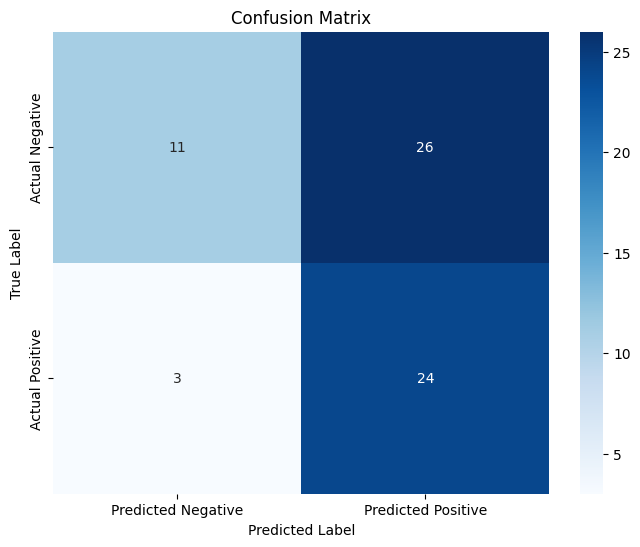

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# converting confusion matrix to numpy array
conf_matrix = np.asarray(cm_df)

In [ ]:
# Creating a function to report summary results

def confusion_metrics(conf_matrix):
  """
  Creates summary results for assessing model performance
  params: numpy confusion matrix

  """
  # Getting value from confusion matrix using [row,column]
  TN = conf_matrix[0,0]
  TP = conf_matrix[1,1]
  FN = conf_matrix[1,0]
  FP = conf_matrix[0,1]

  print("True Positives:", TP)
  print("True Negatives:", TN)
  print("False Positives:", FP)
  print("False Negatives:", FN)

  # Calculate accuracy
  conf_accuracy = (float(TP+TN)/float(TP+TN+FP+FN))

  # Calculate mis-classification
  conf_misclassification = 1-conf_accuracy

  # Calculate sensitivity
  conf_sensitivity = (TP/float(TP+FN))

  # Calculate specificity
  conf_specificity = (TN/float(TN+FP))

  # Calculate precision
  conf_precision = (TP/float(TP+FP))

  # Calculate positive predicted value
  conf_pos_pred = (TP/float(TP+FP))

  # Calculate negative predicted value
  conf_neg_pred = (TN/float(TN+FN))

  # Calculate f_1 score
  conf_f1 = 2 * ((conf_precision * conf_sensitivity)/(conf_precision + conf_sensitivity))

  print("Summary Results:")
  print(f"Accuracy: {round(conf_accuracy, 2)}")
  print(f"Mis-classifiaction: {round(conf_misclassification, 2)}")
  print(f"Sensitivity (Recall): {round(conf_sensitivity, 2)}")
  print(f"Specificity: {round(conf_specificity, 2)}")
  print(f"Precision: {round(conf_precision, 2)}")
  print(f"Positive Predicted Value: {round(conf_pos_pred, 2)}")
  print(f"Negative Predicted Value: {round(conf_neg_pred, 2)}")
  print(f"F1 Score: {round(conf_f1, 2)}")
  print(f"ROC AUC for Training using Predicted Probabilities: {round(auc_train_prob,3)}")
  print(f"ROC AUC for Testing Using Predicted Probabilities: {round(auc_test_prob,3)}")
  print(f"ROC AUC for Training using Predicted Classes: {round(auc_train_class,3)}")
  print(f"ROC AUC for Testing using Predicted Classes: {round(auc_test_class,3)}")

In [ ]:
results = confusion_metrics(conf_matrix)

True Positives: 24
True Negatives: 11
False Positives: 26
False Negatives: 3
Summary Results:
Accuracy: 0.55
Mis-classifiaction: 0.45
Sensitivity (Recall): 0.89
Specificity: 0.3
Precision: 0.48
Positive Predicted Value: 0.48
Negative Predicted Value: 0.79
F1 Score: 0.62
ROC AUC for Training using Predicted Probabilities: 0.945
ROC AUC for Testing Using Predicted Probabilities: 0.7
ROC AUC for Training using Predicted Classes: 0.86
ROC AUC for Testing using Predicted Classes: 0.69


In [ ]:
# Variable Importance Analysis

attributes = list(X_train)
importance_rf = best_randomestimators.feature_importances_

feature_importance_rf = sorted(zip(importance_rf, attributes), reverse=True)
feature_importance_rf = pd.DataFrame(feature_importance_rf)
feature_importance_rf.columns=["Feature importance", "Attribute"]

feature_importance_rf


,Feature importance,Attribute
0,0.185505,weather_wind_speed_10m_max
1,0.180696,weather_temperature_2m_mean
2,0.084388,heavy_vehicle_flag
3,0.062572,weather_precipitation_sum
4,0.057744,weather_rain_sum
5,0.047804,vehicle_count
6,0.044589,gender_M_flag
7,0.038677,Time_Late-Morning
8,0.038614,weather_precipitation_hours
9,0.032570,car_flag


Text(0.5, 1.0, 'Attributes by Feature Importance')

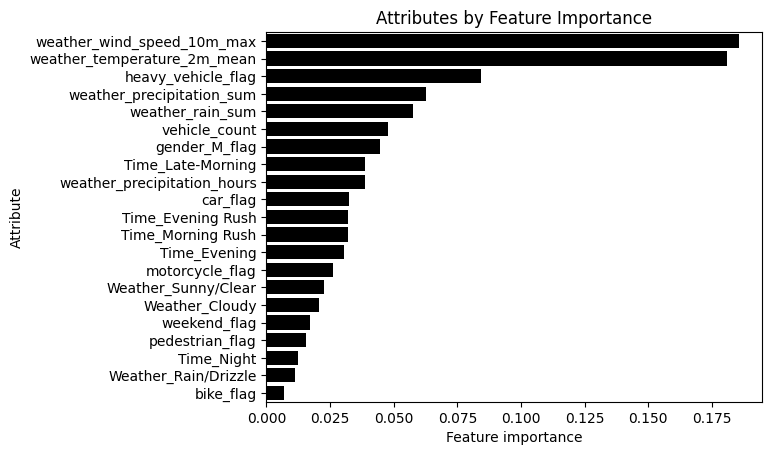

In [ ]:

ax=sns.barplot(data=feature_importance_rf, x="Feature importance", y="Attribute",orient="h",color="black")
plt.title("Attributes by Feature Importance")


In [ ]:
print(classification_report(y_test, adjusted_y_scores))

              precision    recall  f1-score   support

           0       0.79      0.30      0.43        37
           1       0.48      0.89      0.62        27

    accuracy                           0.55        64
   macro avg       0.63      0.59      0.53        64
weighted avg       0.66      0.55      0.51        64



In [ ]:
import shap
best_model = best_randomestimators

In [ ]:
# Convert boolean columns to integer type for SHAP compatibility
for col in X_test.select_dtypes(include="bool").columns:
    X_test[col] = X_test[col].astype(int)

# Do the same for X_train if it will be used with shap later
for col in X_train.select_dtypes(include='bool').columns:
    X_train[col] = X_train[col].astype(int)

explainer = shap.TreeExplainer(best_model, X_test)

shap_values = explainer.shap_values(X_test, check_additivity=False)

In [ ]:
shap_values[1:,]

array([[[ 3.41277878e-02, -3.41277872e-02],
        [-1.36650532e-02,  1.36650492e-02],
        [ 5.72014542e-03, -5.72014456e-03],
        ...,
        [ 2.10718189e-02, -2.10718171e-02],
        [ 1.31743766e-05, -1.31742934e-05],
        [ 1.07462243e-03, -1.07462225e-03]],

       [[ 4.97833607e-03, -4.97833393e-03],
        [-6.43454505e-04,  6.43454401e-04],
        [ 3.04567443e-03, -3.04567431e-03],
        ...,
        [ 1.43868882e-02, -1.43868885e-02],
        [-2.09704950e-03,  2.09704978e-03],
        [-3.07719239e-03,  3.07719239e-03]],

       [[ 8.41304731e-04, -8.41303521e-04],
        [-5.41758241e-03,  5.41758280e-03],
        [ 2.84880160e-03, -2.84880134e-03],
        ...,
        [-2.29206784e-02,  2.29206781e-02],
        [-4.76409134e-03,  4.76409160e-03],
        [-2.33998810e-03,  2.33998820e-03]],

       ...,

       [[ 7.36900000e-03, -7.36899839e-03],
        [ 2.21597911e-03, -2.21597966e-03],
        [-1.52821783e-02,  1.52821777e-02],
        ...,
     

In [ ]:
shap_values.shape

(64, 21, 2)

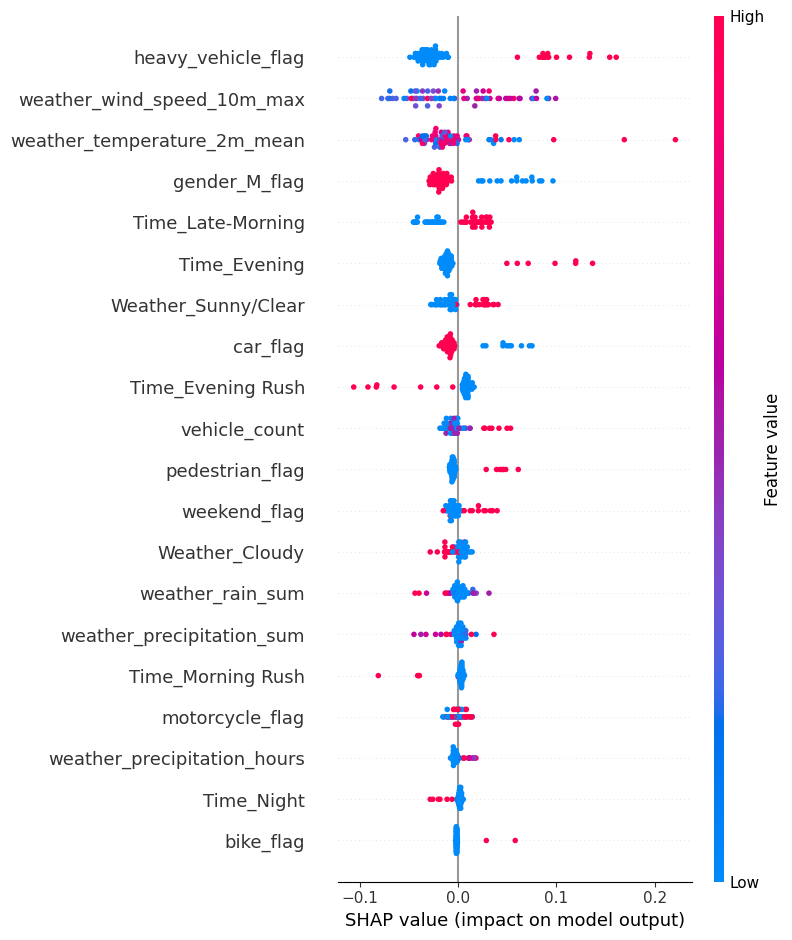

In [ ]:
shap.summary_plot(shap_values[:,:,1], X_test)